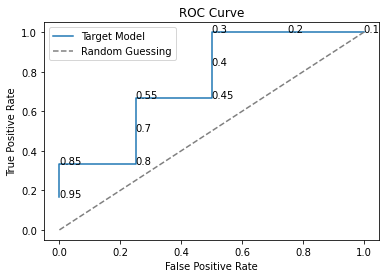

In [10]:
import matplotlib.pyplot as plt

confidences = [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1]
correct_classes = [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]

# Calculate false positive rate (FPR) and true positive rate (TPR) for different threshold values
fprs, tprs = [], []
for threshold in confidences:
    predicted_classes = [1 if c >= threshold else 0 for c in confidences]
    true_positives = sum([1 for p, a in zip(predicted_classes, correct_classes) if p == 1 and a == 1])
    false_positives = sum([1 for p, a in zip(predicted_classes, correct_classes) if p == 1 and a == 0])
    true_negatives = sum([1 for p, a in zip(predicted_classes, correct_classes) if p == 0 and a == 0])
    false_negatives = sum([1 for p, a in zip(predicted_classes, correct_classes) if p == 0 and a == 1])
    fpr = false_positives / (false_positives + true_negatives)
    tpr = true_positives / (true_positives + false_negatives)
    fprs.append(fpr)
    tprs.append(tpr)

# Plot ROC curve
plt.plot(fprs, tprs, label='Target Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# annotate the confidences on the graph
for i, threshold in enumerate(confidences):
    plt.annotate(threshold, (fprs[i], tprs[i]))
plt.legend()
plt.show()